# Datathon #5 - Clustering

In [2]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.cluster as skc
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

For this datathon we'll be working with data about LEGO construction sets. 

LEGO data comes from Rebrickable (https://rebrickable.com) via Kaggle (https://www.kaggle.com/rtatman/lego-database).
The database contains all data in the Rebrickable database for sets released up to mid-2017 (almost all sets ever). 

We're giving you two simplified versions of the larger dataset.

**(File 1) LEGO Colors** — Contains data on all of the different colors of LEGO pieces ever released. 
- Unique pieces = How many different kinds of bricks have been produced in the color.
- Unique sets = How many different LEFO sets have included bricks in the color.
- Unique themes = How many different LEGO themes ("Town", "Space", "Ninjago", "Harry Potter", etc.) have included the color.
- Number of years = How many years have had sets with the color.
- Max set size = How big was the biggest set that includes the color. 
- Median set size = How big was the median set that includes the color.

In [4]:
lego_colors = pd.read_csv("Lego Colors Data.tab.txt",delimiter="\t")
lego_colors.head()

,Color,Number of Unique Pieces,Number of Unique Sets,Number of Unique Themes,Number of Years,Max Set Size,Median Set Size
0,Aqua,55,48,15,10,1305,73
1,Black,4367,8333,373,60,5922,330
2,Blue,1822,5279,342,65,5922,300
3,Blue-Violet,35,17,3,2,987,165
4,Bright Green,257,726,131,24,5200,155


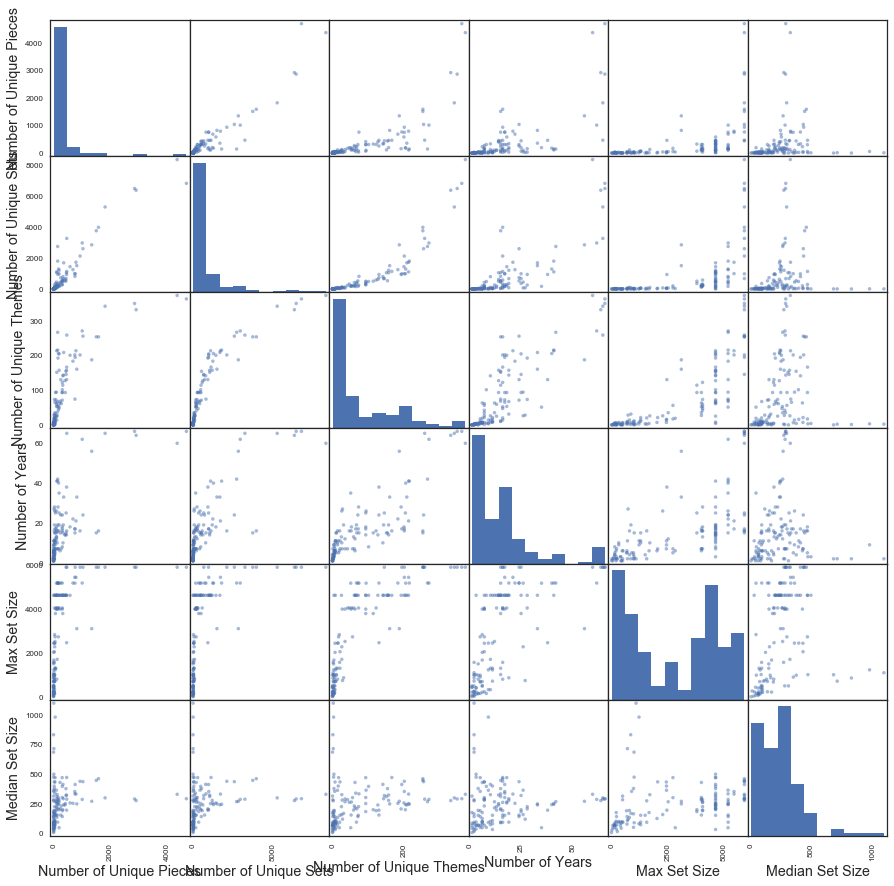

In [5]:
_ = pd.plotting.scatter_matrix(lego_colors, figsize=(15,15))

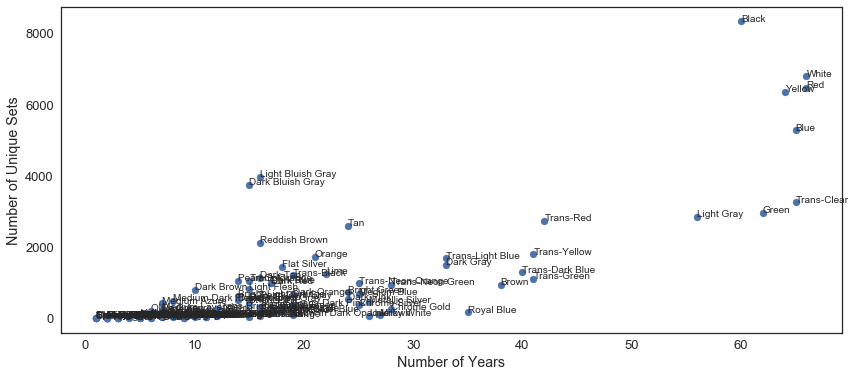

In [6]:
# Plot two dimensions with color names
plt.figure(figsize=(14,6))
plt.scatter(lego_colors["Number of Years"], lego_colors["Number of Unique Sets"])
plt.xlabel('Number of Years')
plt.ylabel('Number of Unique Sets')

for i, row in enumerate(lego_colors.values):
    plt.annotate(row[0],xy=(row[4],row[2]),fontsize=10)

**(File 2) LEGO Colors by Set** — Contains data on the colors of the pieces in each LEGO set.

- Set Num = A unique alphanumeric ID number for each set. 
- Set Name = The official name of the set (some names are reused for more than one set).
- Year = The year the set was released.
- Num Parts = Total number of parts listed on the box.
- [Colors] = Number of parts of each color in the set, according to the Rebrickable database.

You can also get more data about individual sets by going to http://rebrickable.com/sets/{SetNum}

In [7]:
set_colors = pd.read_excel("Set Color Data.xlsx")
set_colors.fillna(0,inplace=True)
set_colors.head()

,Set Num,Set Name,Year,Num Parts,[No Color],Aqua,Black,Blue,Blue-Violet,Bright Green,...,Trans-Very Lt Blue,Trans-Yellow,Unknown,Very Light Bluish Gray,Very Light Gray,Very Light Orange,Violet,White,Yellow,Yellowish Green
0,2015775,Dragon Fortress,2003,741,39.0,0.0,199.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,0.0
1,2015410,Scorpion Palace,2003,354,25.0,0.0,45.0,4.0,0.0,2.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,89.0,20.0,0.0
2,1089-1,Lego Basic Figures - 24 elements,1985,24,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015045,Temple of Mount Everest,2003,288,24.0,0.0,67.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0,26.0,0.0
4,2823692,Simple and Motorized Machines Activity Pack,1997,24,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Questions**

1. Using the first data file ("Lego Colors Data.tab.txt") use hierarchical clustering to find groups of colors that have similar characteristics. What **data columns**, **distance metric**, and **distance threshold** do you think give the best result?
2. Using the same data file, use k-means clustering to find groups of colors that have similar characteristics. What **set of data columns** and what **value of k** do you think gives the best result?
3. Using the second data file ("Set Color Data.xlsx") — in what year did LEGO release the largest number of colors? The largest number of sets?

**  +2 more analysis questions of your own** (using either dataset). 

C:\Users\dmac1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


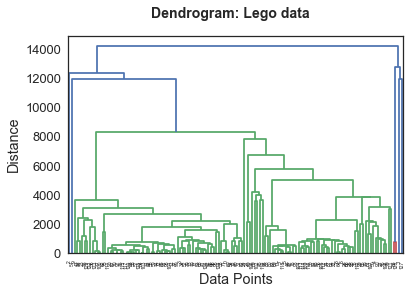

In [8]:
lego_colors_no = lego_colors.drop(['Color'], axis = 1)
dist_xy = spd.squareform(spd.pdist(lego_colors_no, metric='euclidean'))
dist_xy.shape
dist_xy[:4,:4]
Z_xy = sph.linkage(dist_xy, method='single')  # obtain the linkage matrix
_ = sph.dendrogram(Z_xy)  # plot the linkage matrix as a dendrogram
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.suptitle('Dendrogram: Lego data', 
             fontweight='bold', fontsize=14);

In [10]:
#lego_labels = sph.fcluster(lego_colors_no, 10000.00, criterion='distance')
#df_lego['cluster_label'] = lego_labels
#df_lego.head()

In [29]:
#Question 3


df_pivot = pd.melt(set_colors,value_vars=['[No Color]',
'Aqua',
'Black',
'Blue',
'Blue-Violet',
'Bright Green',
'Bright Light Blue',
'Bright Light Orange',
'Bright Light Yellow',
'Bright Pink',
'Brown',
'Chrome Antique Brass',
'Chrome Black',
'Chrome Blue',
'Chrome Gold',
'Chrome Green',
'Chrome Pink',
'Chrome Silver',
'Copper',
'Dark Azure',
'Dark Blue',
'Dark Blue-Violet',
'Dark Bluish Gray',
'Dark Brown',
'Dark Flesh',
'Dark Gray',
'Dark Green',
'Dark Orange',
'Dark Pink',
'Dark Purple',
'Dark Red',
'Dark Tan',
'Dark Turquoise',
'Earth Orange',
'Fabuland Brown',
'Flat Dark Gold',
'Flat Silver',
'Flesh',
'Glitter Trans-Clear',
'Glitter Trans-Dark Pink',
'Glitter Trans-Light Blue',
'Glitter Trans-Neon Green',
'Glitter Trans-Purple',
'Glow In Dark Opaque',
'Glow In Dark Trans',
'Glow in Dark White',
'Green',
'Lavender',
'Light Aqua',
'Light Blue',
'Light Bluish Gray',
'Light Flesh',
'Light Gray',
'Light Green',
'Light Lime',
'Light Orange',
'Light Pink',
'Light Purple',
'Light Salmon',
'Light Turquoise',
'Light Violet',
'Light Yellow',
'Lime',
'Maersk Blue',
'Magenta',
'Medium Azure',
'Medium Blue',
'Medium Dark Flesh',
'Medium Dark Pink',
'Medium Green',
'Medium Lavender',
'Medium Lime',
'Medium Orange',
'Medium Violet',
'Metal Blue',
'Metallic Gold',
'Metallic Green',
'Metallic Silver',
'Milky White',
'Olive Green',
'Orange',
'Pearl Dark Gray',
'Pearl Gold',
'Pearl Light Gold',
'Pearl Light Gray',
'Pearl Very Light Gray',
'Pearl White',
'Pink',
'Purple',
'Red',
'Reddish Brown',
'Royal Blue',
'Rust',
'Salmon',
'Sand Blue',
'Sand Green',
'Sand Purple',
'Sand Red',
'Sky Blue',
'Speckle Black-Copper',
'Speckle Black-Gold',
'Speckle Black-Silver',
'Speckle DBGray-Silver',
'Tan',
'Trans Light Royal Blue',
'Trans-Black',
'Trans-Bright Green',
'Trans-Clear',
'Trans-Dark Blue',
'Trans-Dark Pink',
'Trans-Green',
'Trans-Light Blue',
'Trans-Light Purple',
'Trans-Medium Blue',
'Trans-Neon Green',
'Trans-Neon Orange',
'Trans-Neon Yellow',
'Trans-Orange',
'Trans-Pink',
'Trans-Purple',
'Trans-Red',
'Trans-Very Lt Blue',
'Trans-Yellow',
'Unknown',
'Very Light Bluish Gray',
'Very Light Gray',
'Very Light Orange',
'Violet',
'White',
'Yellow',
'Yellowish Green'
],   var_name="color", id_vars = "Year",value_name="colorNum")
df_pivot
writer = pd.ExcelWriter('pivoted.xlsx', engine='xlsxwriter')

# Write your DataFrame to a file     
df_pivot.to_excel(writer, 'Sheet1')

# Save the result 
writer.save()